In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [16]:
df = sns.load_dataset("diamonds")

In [17]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [18]:
df = pd.get_dummies(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Ideal      53940 non-null  bool   
 8   cut_Premium    53940 non-null  bool   
 9   cut_Very Good  53940 non-null  bool   
 10  cut_Good       53940 non-null  bool   
 11  cut_Fair       53940 non-null  bool   
 12  color_D        53940 non-null  bool   
 13  color_E        53940 non-null  bool   
 14  color_F        53940 non-null  bool   
 15  color_G        53940 non-null  bool   
 16  color_H        53940 non-null  bool   
 17  color_I        53940 non-null  bool   
 18  color_

In [20]:
X=df.drop('price', axis=1)
y=df['price']

In [21]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Ideal      53940 non-null  float64
 8   cut_Premium    53940 non-null  float64
 9   cut_Very Good  53940 non-null  float64
 10  cut_Good       53940 non-null  float64
 11  cut_Fair       53940 non-null  float64
 12  color_D        53940 non-null  float64
 13  color_E        53940 non-null  float64
 14  color_F        53940 non-null  float64
 15  color_G        53940 non-null  float64
 16  color_H        53940 non-null  float64
 17  color_I        53940 non-null  float64
 18  color_

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet(alpha=0.1, l1_ratio=0.5))
])

pipe.fit(X_train, y)
y_pred = pipe.predict(X_test)

In [25]:
en = ElasticNet()
en.fit(X_train, y)

ElasticNet()

In [26]:
y_pred=en.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mae = {mae}.")
print(f"mse = {mse}.")
print(f"r2 score = {mae}.")

mae = 1044.3070175355672.
mse = 2419947.2033971944.
r2 score = 1044.3070175355672.


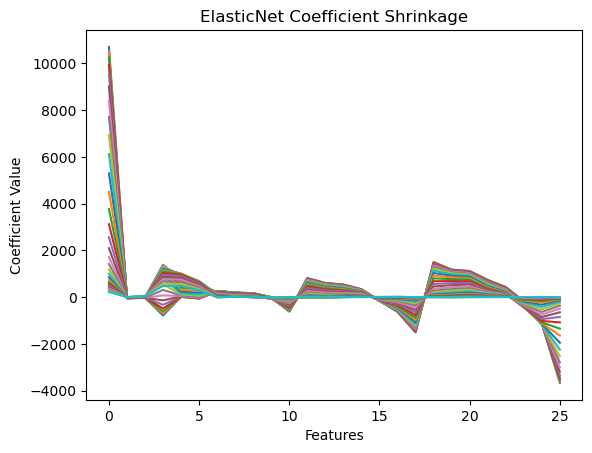

In [30]:
alphas = np.logspace(-3, 1, 30)

plt.figure()

for a in alphas:
    model = ElasticNet(alpha=a, l1_ratio=0.5, max_iter=5000)
    model.fit(X, y)
    plt.plot(model.coef_)

plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("ElasticNet Coefficient Shrinkage")
plt.show()